In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import zipfile
import os

# Define the path to the zip file and the extraction folder
zip_file_path = '/content/drive/MyDrive/Masters/voice dataset/voice archive.zip'  # Update with the correct path to your zip file
extract_folder = '/content/voice archive/'  # Destination folder for extracted files

# Create the extraction folder if it doesn't exist
if not os.path.exists(extract_folder):
    os.makedirs(extract_folder)

# Extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

print("Extraction completed!")


Extraction completed!


In [ ]:
# List files in the extracted folder
extracted_files = os.listdir(extract_folder)
print(extracted_files[:10])  # Display the first 10 files


['AudioWAV']


In [ ]:
# Path to the extracted audio files folder (assuming 'AudioWAV' folder exists)
audio_folder = os.path.join(extract_folder, 'AudioWAV')

# List all files in the AudioWAV folder
audio_files = os.listdir(audio_folder)
print(f"Total audio files in 'AudioWAV': {len(audio_files)}")
print("First 10 audio files:", audio_files[:10])

# Filter for .wav files
wav_files = [f for f in audio_files if f.endswith('.wav')]
print(f"Total .wav files in 'AudioWAV': {len(wav_files)}")
print("First 10 .wav files:", wav_files[:10])


Total audio files in 'AudioWAV': 7442
First 10 audio files: ['1028_IWW_HAP_XX.wav', '1073_IEO_ANG_HI.wav', '1025_IEO_FEA_MD.wav', '1019_IWL_SAD_XX.wav', '1048_IWL_HAP_XX.wav', '1042_ITS_NEU_XX.wav', '1081_TSI_NEU_XX.wav', '1002_DFA_HAP_XX.wav', '1066_IEO_ANG_MD.wav', '1053_WSI_DIS_XX.wav']
Total .wav files in 'AudioWAV': 7442
First 10 .wav files: ['1028_IWW_HAP_XX.wav', '1073_IEO_ANG_HI.wav', '1025_IEO_FEA_MD.wav', '1019_IWL_SAD_XX.wav', '1048_IWL_HAP_XX.wav', '1042_ITS_NEU_XX.wav', '1081_TSI_NEU_XX.wav', '1002_DFA_HAP_XX.wav', '1066_IEO_ANG_MD.wav', '1053_WSI_DIS_XX.wav']


In [ ]:
import librosa
import numpy as np
import os

# Function to extract MFCC features from an audio file
def extract_advanced_features(audio_path):
    try:
        y, sr = librosa.load(audio_path, sr=None)
        features = np.hstack([
            np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13), axis=1),
            np.mean(librosa.feature.chroma_stft(y=y, sr=sr), axis=1),
            np.mean(librosa.feature.spectral_contrast(y=y, sr=sr), axis=1),
            np.mean(librosa.feature.spectral_rolloff(y=y, sr=sr), axis=1),
            np.mean(librosa.feature.zero_crossing_rate(y), axis=1),
        ])
        return features
    except Exception as e:
        print(f"Error processing {audio_path}: {e}")
        return None


# Folder containing the audio files
audio_folder = '/content/voice archive/AudioWAV'

# Get all .wav files in the folder
wav_files = [f for f in os.listdir(audio_folder) if f.endswith('.wav')]

# Initialize lists for features and labels
X = []
y = []

# Iterate through each .wav file and extract features
for audio_file in wav_files:
    audio_path = os.path.join(audio_folder, audio_file)
    features = extract_advanced_features(audio_path)  # Use advanced features
    if features is not None:
        X.append(features)
        label = audio_file.split('_')[1]  # Extract emotion label
        y.append(label)

# Convert X and y to NumPy arrays after appending all features and labels
X = np.array(X)
y = np.array(y)

# Display the results
print(f"Extracted features from {len(X)} audio files.")
print(f"Feature vector shape: {X.shape}")
print(f"First 10 labels: {y[:10]}")


Extracted features from 7442 audio files.
Feature vector shape: (7442, 34)
First 10 labels: ['IWW' 'IEO' 'IEO' 'IWL' 'IWL' 'ITS' 'TSI' 'DFA' 'IEO' 'WSI']


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the labels
y_encoded = label_encoder.fit_transform(y)

# Show first 10 encoded labels
print(f"First 10 encoded labels: {y_encoded[:10]}")


First 10 encoded labels: [ 6  1  1  5  5  4 10  0  1 11]


In [ ]:
def extract_advanced_features(audio_path, max_len=300):
    try:
        y, sr = librosa.load(audio_path, sr=None)
        mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)

        # Pad or truncate MFCC to a fixed length
        if mfcc.shape[1] < max_len:
            pad_width = max_len - mfcc.shape[1]
            mfcc = np.pad(mfcc, pad_width=((0, 0), (0, pad_width)), mode='constant')
        else:
            mfcc = mfcc[:, :max_len]

        mfcc_mean = np.mean(mfcc.T, axis=0)
        return mfcc_mean
    except Exception as e:
        print(f"Error processing {audio_path}: {e}")
        return None

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

print(f"Training set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")


Training set size: 5953
Testing set size: 1489


In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Scale the training and testing sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Feature scaling completed.")


Feature scaling completed.


In [ ]:
pip install tensorflow


In [ ]:
from tensorflow.keras import models, layers


In [ ]:
model = models.Sequential([
    layers.InputLayer(input_shape=(X_train_scaled.shape[1],)),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.4),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(len(np.unique(y_encoded)), activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

# Train the model with callbacks
history = model.fit(
    X_train_scaled, y_train,
    validation_data=(X_test_scaled, y_test),
    epochs=100,  # Increased epochs for better learning
    batch_size=32,
    callbacks=[early_stopping, lr_scheduler]
)



Epoch 1/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.3600 - loss: 1.9899 - val_accuracy: 0.5883 - val_loss: 1.2265 - learning_rate: 0.0010
Epoch 2/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6418 - loss: 1.0488 - val_accuracy: 0.7018 - val_loss: 0.8625 - learning_rate: 0.0010
Epoch 3/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6800 - loss: 0.8878 - val_accuracy: 0.7146 - val_loss: 0.7887 - learning_rate: 0.0010
Epoch 4/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.7245 - loss: 0.7929 - val_accuracy: 0.7354 - val_loss: 0.7449 - learning_rate: 0.0010
Epoch 5/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.7306 - loss: 0.7712 - val_accuracy: 0.7441 - val_loss: 0.7185 - learning_rate: 0.0010
Epoch 6/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7540 - loss: 0.6940 - val_accuracy: 0.7515 - val_loss: 0.7057 - learning_rate: 0.0010
Epoch 7/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7594 - loss: 

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7963 - loss: 0.5855
Test Accuracy: 80.66%
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step


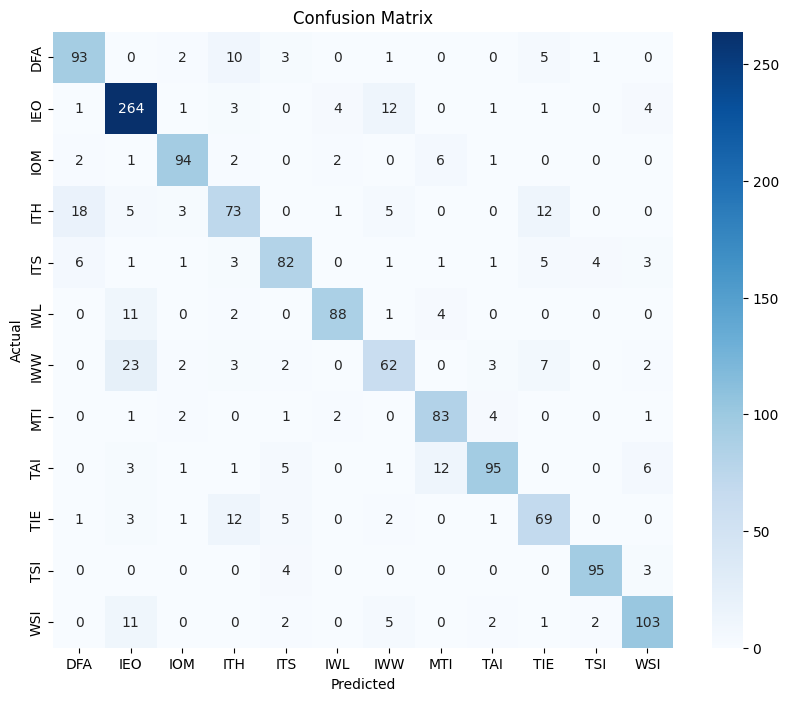

              precision    recall  f1-score   support

         DFA       0.77      0.81      0.79       115
         IEO       0.82      0.91      0.86       291
         IOM       0.88      0.87      0.87       108
         ITH       0.67      0.62      0.65       117
         ITS       0.79      0.76      0.77       108
         IWL       0.91      0.83      0.87       106
         IWW       0.69      0.60      0.64       104
         MTI       0.78      0.88      0.83        94
         TAI       0.88      0.77      0.82       124
         TIE       0.69      0.73      0.71        94
         TSI       0.93      0.93      0.93       102
         WSI       0.84      0.82      0.83       126

    accuracy                           0.81      1489
   macro avg       0.80      0.79      0.80      1489
weighted avg       0.81      0.81      0.81      1489



In [ ]:
# Evaluate the model on the test data
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test_scaled, y_test)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

# Confusion matrix
y_pred = np.argmax(model.predict(X_test_scaled), axis=1)
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

